In [1]:
import numpy as np, prjlib, plottools as pl, binning as bins
from matplotlib.pyplot import *

In [2]:
p, __ = prjlib.filename_init(doreal='True',stype='lcmb',ver='v2',rlmin='200')
L, mf = np.loadtxt(p.quad.f['EB'].mfcl,usecols=(0,1),unpack=True)
L, n0 = np.loadtxt(p.quad.f['EB'].n0bs,usecols=(0,1),unpack=True)
mf -= n0/300.

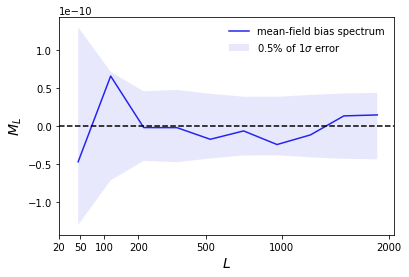

In [4]:
bn = 10 
mb0 = bins.multipole_binning(bn,spc='p2',lmin=20,lmax=2048) 
scb = prjlib.binned_cl_rlz(p.quad.f['EB'].cl,1,100,mb0) 
mfb = bins.binning(mf,mb0) 
vcb = np.std(scb,axis=0)
pl.plot_1dstyle(spc='p2',ylab=r'$M_L$',xmin=20,xmax=2048) 
fill_between(np.sqrt(mb0.bc),vcb*0.005,-vcb*0.005,alpha=0.1,label=r'$0.5\%$ of $1\sigma$ error') 
plot(np.sqrt(mb0.bc),mfb,label='mean-field bias spectrum') 
axhline(0,color='k',ls='--')
legend(loc=0,frameon=False)